In [10]:
import helper as h
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Specify working directory and data

In [21]:
wd = r'Y:\nick\fiber_photometry\vCA1\Thy1\CXR3\20230417' # This is the main directory where the raw data is stored
behavior_raw = wd + os.path.sep + '20230417-CXR3-social-f-n.h264'
data_block = wd + os.path.sep + "test-230417-144627-CXR3-social-f-n" # Folder containing fiber photometry data
video_name = behavior_raw.split("\\")[-1][:-5]
output_path = wd + os.path.sep + 'outputs' # Folder where most of the outputs will be saved
h.set_path(output_path)

## Trim behavior video

In [22]:
# Generate the trimmed video. Select ROI surrounding LED here
if not any(fname.endswith(video_name + '_trimmed.avi') for fname in os.listdir(output_path)):
    %matplotlib tk
    h.trim_video(behavior_raw, output_path)
    %matplotlib inline

Reading behavior video...
Writing trimmed video...
Done


## Get mouse position tracks

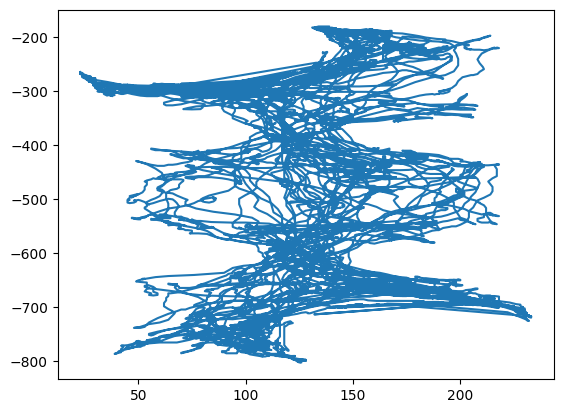

In [23]:
# Run the code to track the positions, or load the data if it was already calculated
if not any(fname.endswith(video_name + '_tracks.npy') for fname in os.listdir(output_path)):
    %matplotlib tk
    x_pos, y_pos, chamber_mask = h.get_tracks(video_name, output_path, threshold=28, ksize=5)
    %matplotlib inline
else:
    x_pos, y_pos = np.load(output_path + os.path.sep + video_name + '_tracks.npy')

plt.figure(),
plt.plot(x_pos, -np.array(y_pos))


## Get fiber photometry data

read from t=0s to t=931.82s


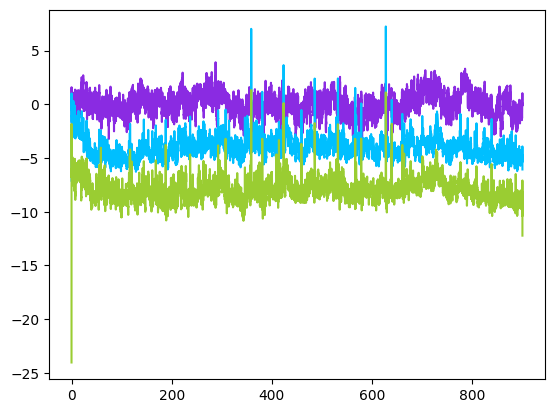

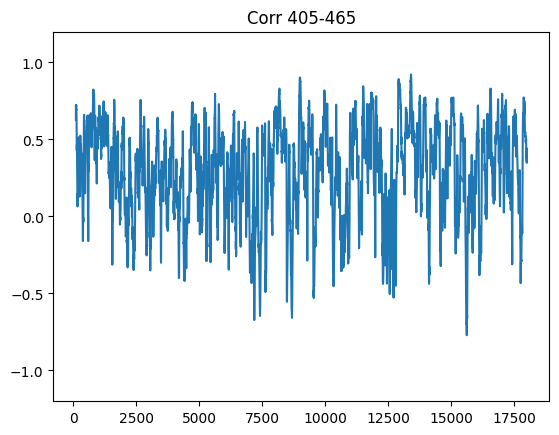

In [24]:
if not any(fname.endswith(video_name + '_fiber_data.npz') for fname in os.listdir(output_path)):
    dff465, t, dff560 = h.process_fiber_data(data_block, output_path, video_name)
else:
    fiber_data = np.load(output_path + os.path.sep + video_name + '_fiber_data.npz')
    dff405 = fiber_data['dff405']
    dff465 = fiber_data['dff465']
    dff560 = fiber_data['dff560']
    t = fiber_data['time']
    
    plt.figure(), 
    plt.plot(t, dff405, color=[138/255, 43/255, 226/255]), 
    plt.plot(t, dff465-4, color=[0/255,191/255,255/255]), 
    plt.plot(t, dff560-8, color=[154/255,205/255,50/255])

    # compute rolling correlation between 465 and 405
    df = pd.DataFrame({'df405': dff405, 'df465': dff465})
    rolling_corr = df['df405'].rolling(100).corr(df['df465'])
    plt.figure(), plt.plot(rolling_corr), plt.ylim([-1.2, 1.2]), plt.title('Corr 405-465')

## Create annotated plot with tracks and fiber photometry data for 3-chamber experiments

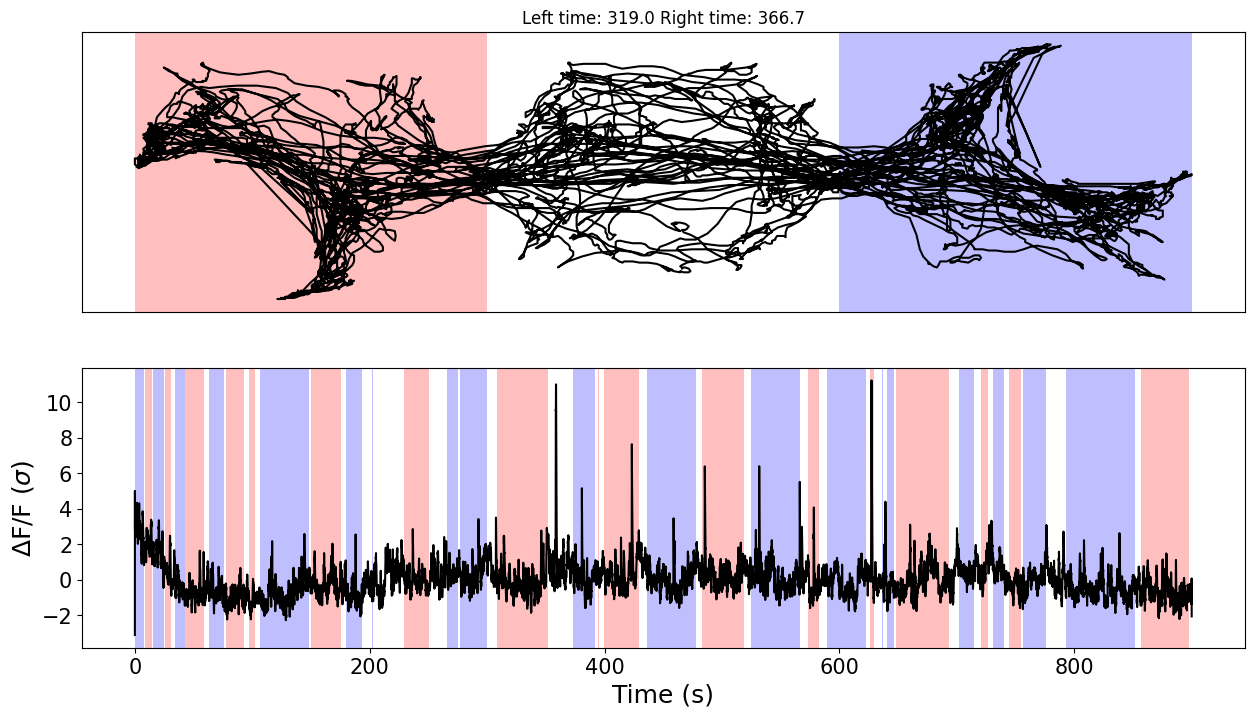

In [25]:
h.make_annotated_plot(x_pos, y_pos, t, dff465, output_path, video_name, experiment_type='3-chamber')

## Make combined video of behavior and fiber photometry

Making combined video
Use jRCaMP1b channel? y/[n]
Y:\nick\fiber_photometry\test\outputs\20230407-CXR3-5_combined_fiber_behavior.mp4


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Y:\\nick\\fiber_photometry\\test\\outputs'

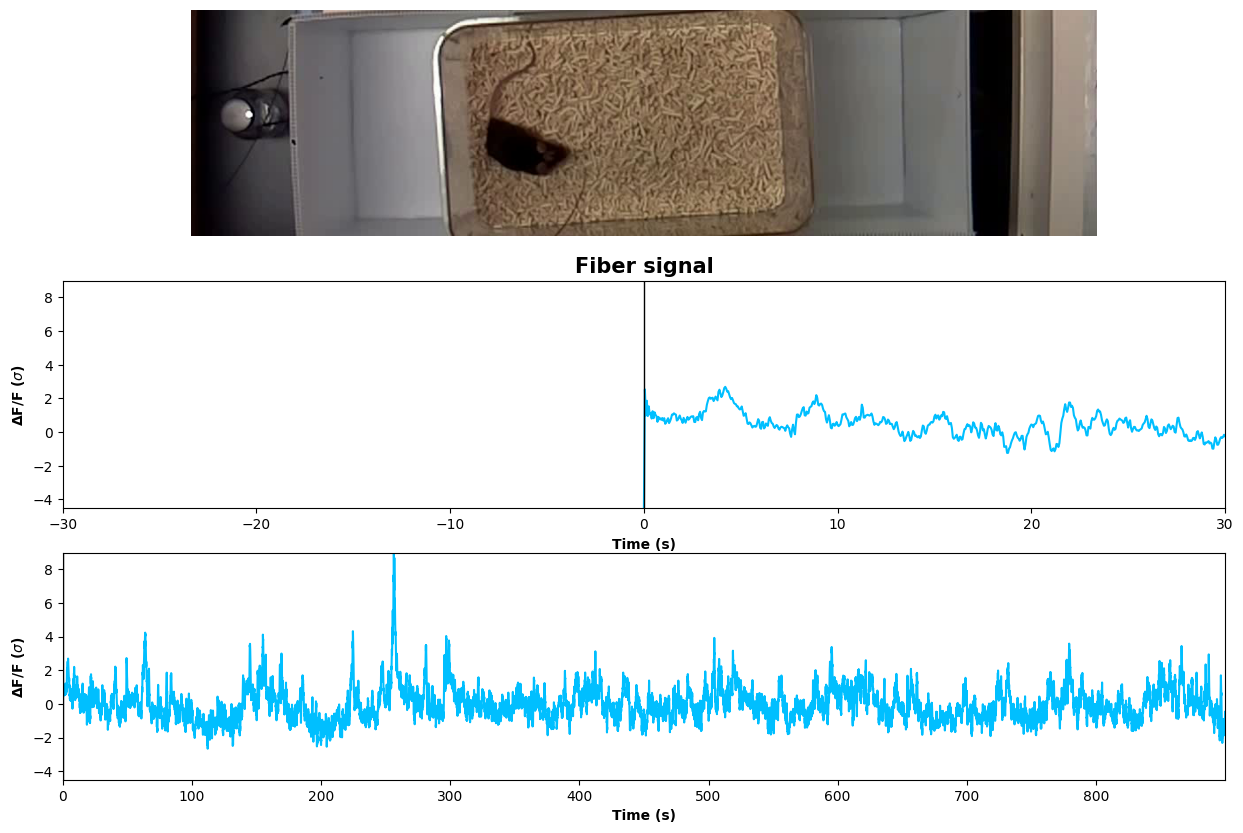

In [5]:
print("Making combined video")
h.make_combined_video(output_path, video_name, t, dff465, dff560)
print("Done")


In [13]:
print(video_name)

20230417-CXL2-LL-urine
